In [1]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler,normalize
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
def PCA_calc (data,N_PCs,selected_names):
    
    print('             ')
    print('PCA Control Output')
    print('----------------------------------')


    #centralizar os dados e colocá-los com desvioPadrão=1
        
    scaler = StandardScaler().fit(data)
        
    features_padronizadas = scaler.transform(data)

    pca= PCA(n_components = N_PCs)
    pca.fit(features_padronizadas)
        
    variacao_percentual_pca = np.round(pca.explained_variance_ratio_ * 100, decimals = 2)
        
    # plota variancia mantida por cada componente principal
        
    fig = plt.figure(figsize=[16,8])
    ax = fig.subplots(1,1)
    ax.bar(x=['PC' + str(x) for x in range(1,(N_PCs+1))],height=variacao_percentual_pca[0:N_PCs])

    ax.set_ylabel('Percentage of Variance Held',fontsize=27)
    ax.set_xlabel('Principal Components',fontsize=20)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    ax.grid()
    plt.show()
    
    #Salva o resultado
    
    fig.savefig('Percentage_of_Variance_Held.png', bbox_inches='tight')

    print('Variation maintained: %.2f' % variacao_percentual_pca.sum())
    print('                  ')

    features_reduzidas = pca.transform(features_padronizadas)
    print('Original data shape: {}'.format(features_padronizadas.shape))
    print('-' * 20)
    print('Reduced data shape: {}'.format(features_reduzidas.shape))
    print('-' * 20)
            
    ### Análise de atributos ###

    eigen_matrix = np.array(pca.components_)
    
    #invertendo valores negativos
    
    eigen_matrix = pow((pow(eigen_matrix,2)),0.5)

    for i in range (eigen_matrix.shape[0]):

        LineSum = sum(eigen_matrix[i,:])
        for j in range (eigen_matrix.shape[1]):
            eigen_matrix[i,j] = ((eigen_matrix[i,j]*100)/LineSum)
            
    weighted_contribution = np.zeros((2,eigen_matrix.shape[1]))

    for i in range (eigen_matrix.shape[1]):
        NumeratorSum = 0
        for j in range (N_PCs):
            NumeratorSum += eigen_matrix[j,i] * variacao_percentual_pca[j]

        weighted_contribution[0,i] = NumeratorSum / sum(variacao_percentual_pca)

    df_weighted_contribution = pd.DataFrame(weighted_contribution,columns=selected_names)
    df_weighted_contribution = df_weighted_contribution.drop([1])                    
    df_weighted_contribution = df_weighted_contribution.sort_values(by=0, axis=1, ascending=False)
    
    return df_weighted_contribution

             
PCA Control Output
----------------------------------


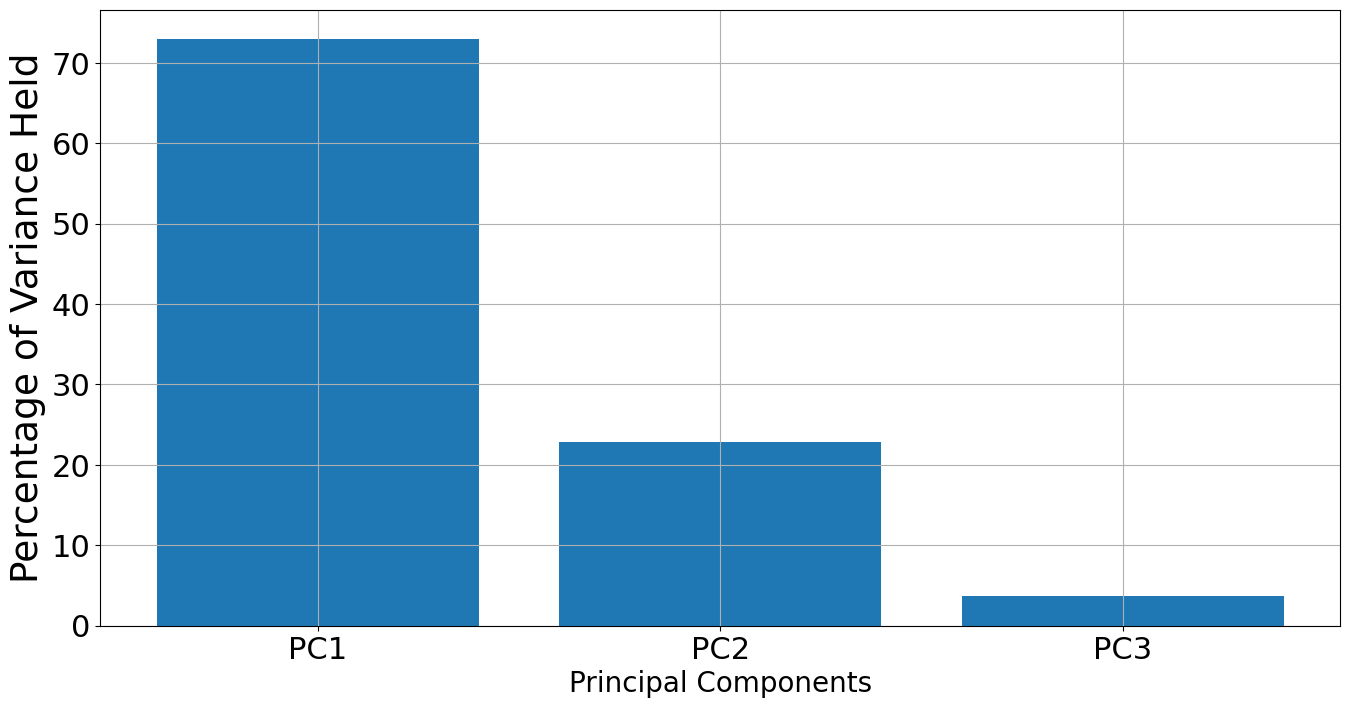

Variation maintained: 99.48
                  
Original data shape: (150, 4)
--------------------
Reduced data shape: (150, 3)
--------------------


In [10]:
iris = datasets.load_iris()

data = iris.data

contribution = PCA_calc (data,3,['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [11]:
contribution

,Sepal Length,Sepal Width,Petal Width,Petal Length
0,27.495202,25.957111,23.850957,22.69673


# References:

- This code wwas used in the analysis presented in the folowwing works:
    - [A New Model to Prevent Failures in Gas Turbine Engines Based on TSFRESH, Self-Organised Direction Aware Data Partitioning Algorithm and Machine Learning Techniques.](https://www.researchgate.net/publication/350911498_A_New_Model_to_Prevent_Failures_in_Gas_Turbine_Engines_Based_on_TSFRESH_Self-Organised_Direction_Aware_Data_Partitioning_Algorithm_and_Machine_Learning_Techniques)
    - [An Autonomous Model to Classify Lathe's Cutting Tools Based on TSFRESH, Self-Organised Direction Aware Data Partitioning Algorithm and Machine Learning Techniques](https://www.researchgate.net/publication/347811424_An_Autonomous_Model_to_Classify_Lathe's_Cutting_Tools_Based_on_TSFRESH_Self-Organised_Direction_Aware_Data_Partitioning_Algorithm_and_Machine_Learning_Techniques?_sg=Vf6xNxEOexsX5yXAlsIWTqvBGM0NUFHHYEqOYOqJKyx3kCx4nPpyFIzXzM_4yn5-qXTUIezGn6-I7BkGhR43WWrDXRIGuyQ_mFkoK54W.DhPab8OZMO5kIL9YR3h9w83hp384X9zO4WjKNHG-J4LLpXA3ExM7qMzW-lKpv_UNDzytRldglhKOLZjp8wSfBQ)